<a href="https://colab.research.google.com/github/jaharaGS/chartbot/blob/main/bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trying to load from Google Drive links...
Successfully loaded from Google Drive links!
Columns in analysis_data after merge:
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'time', 'date', 'timestamp', 'value', 'classification'],
      dtype='object')


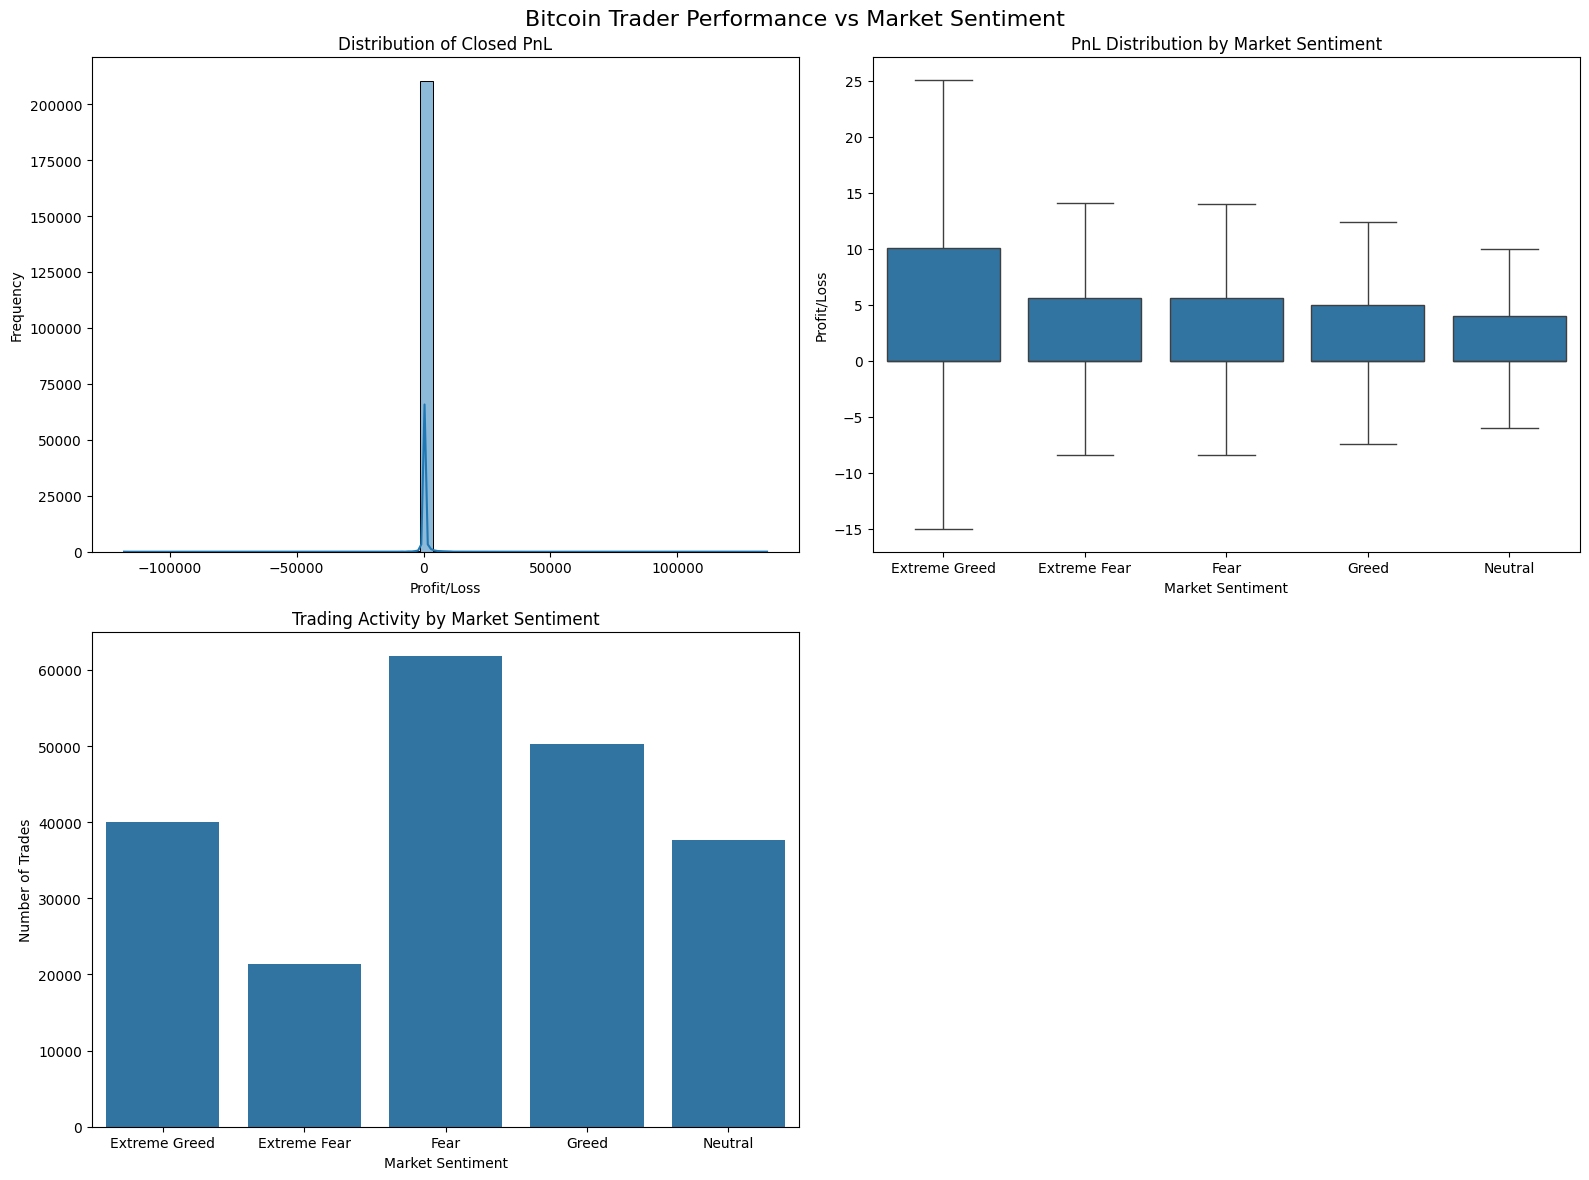


=== KEY INSIGHTS ===

1. Performance by Market Sentiment:
                     mean  median  count
classification                          
Extreme Fear    34.537862     0.0  21400
Extreme Greed   67.892861     0.0  39992
Fear            54.290400     0.0  61837
Greed           42.743559     0.0  50303
Neutral         34.307718     0.0  37686

2. Win Rates by Sentiment:
classification
Extreme Fear     0.370607
Extreme Greed    0.464943
Fear             0.420768
Greed            0.384828
Neutral          0.396991
Name: is_win, dtype: float64

3. Best Performing Market Conditions:
Highest average PnL during: Extreme Greed

Analysis saved to 'bitcoin_sentiment_analysis_results.csv'

ANALYSIS COMPLETE!


In [4]:
# Bitcoin Market Analysis - Complete Robust Solution
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
import requests

# ======================
# 1. DATA LOADING - ULTRA-ROBUST VERSION
# ======================

def load_data():
    """Try multiple methods to load the data"""
    # METHOD 1: Load from provided Google Drive links
    try:
        print("Trying to load from Google Drive links...")
        trader_url = 'https://drive.google.com/uc?export=download&id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs'
        sentiment_url = 'https://drive.google.com/uc?export=download&id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf'

        trader_data = pd.read_csv(trader_url)
        sentiment_data = pd.read_csv(sentiment_url)
        print("Successfully loaded from Google Drive links!")
        return trader_data, sentiment_data
    except Exception as e:
        print(f"Google Drive load failed: {str(e)}")

    # METHOD 2: Load from local Colab upload
    try:
        from google.colab import files
        print("Trying to load from Colab upload...")
        uploaded = files.upload()
        trader_data = pd.read_csv(next(f for f in uploaded if 'trader' in f.lower()))
        sentiment_data = pd.read_csv(next(f for f in uploaded if 'fear' in f.lower() or 'greed' in f.lower()))
        print("Successfully loaded from uploaded files!")
        return trader_data, sentiment_data
    except Exception as e:
        print(f"Upload load failed: {str(e)}")

    # METHOD 3: Manual CSV input
    print("""
    Last resort: Please paste your CSV data below.
    For trader data, copy all content from hyperliquid_trader_data.csv
    For sentiment data, copy all content from bitcoin_fear_greed.csv
    """)
    try:
        trader_csv = input("Paste HYPERLIQUID TRADER DATA CSV content:\n")
        sentiment_csv = input("Paste FEED/GREED INDEX CSV content:\n")
        trader_data = pd.read_csv(StringIO(trader_csv))
        sentiment_data = pd.read_csv(StringIO(sentiment_csv))
        return trader_data, sentiment_data
    except Exception as e:
        raise ValueError(f"Data loading failed completely: {str(e)}")

# Load the data
trader_data, sentiment_data = load_data()

# ======================
# 2. DATA CLEANING & PREPROCESSING
# ======================

# Clean trader data
trader_data = trader_data.dropna(how='all')  # Remove empty rows
trader_data.columns = trader_data.columns.str.strip()  # Clean column names

# Find timestamp column
time_col = next((col for col in trader_data.columns
                if 'time' in col.lower() or 'date' in col.lower()), None)
if not time_col:
    raise ValueError("Could not find time/date column in trader data")

trader_data['time'] = pd.to_datetime(trader_data[time_col], format='%d-%m-%Y %H:%M')
trader_data['date'] = trader_data['time'].dt.date

# Clean sentiment data
sentiment_data.columns = sentiment_data.columns.str.strip()
sentiment_data['date'] = pd.to_datetime(sentiment_data['date']).dt.date

# ======================
# 3. ANALYSIS & VISUALIZATION
# ======================

# Merge data
analysis_data = pd.merge(
    trader_data,
    sentiment_data,
    on='date',
    how='left'
)

print("Columns in analysis_data after merge:")
print(analysis_data.columns)

# Set up visualization
plt.figure(figsize=(16, 12))
plt.suptitle("Bitcoin Trader Performance vs Market Sentiment", fontsize=16)

# Plot 1: PnL Distribution
plt.subplot(2, 2, 1)
sns.histplot(analysis_data['Closed PnL'].dropna(), bins=50, kde=True)
plt.title('Distribution of Closed PnL')
plt.xlabel('Profit/Loss')
plt.ylabel('Frequency')

# Plot 2: Sentiment Impact
plt.subplot(2, 2, 2)
sns.boxplot(
    data=analysis_data,
    x='classification',
    y='Closed PnL',
    showfliers=False  # Remove outliers for better visualization
)
plt.title('PnL Distribution by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Profit/Loss')

# Plot 3: Trading Activity
plt.subplot(2, 2, 3)
sns.countplot(data=analysis_data, x='classification')
plt.title('Trading Activity by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Number of Trades')

# Plot 4: Leverage Usage
# Removed due to missing 'Leverage' column
# plt.subplot(2, 2, 4)
# sns.barplot(
#     data=analysis_data,
#     x='classification',
#     y='Leverage',
#     estimator='median'
# )
# plt.title('Median Leverage Used by Market Sentiment')
# plt.xlabel('Market Sentiment')
# plt.ylabel('Leverage')

plt.tight_layout()
plt.show()

# ======================
# 4. KEY INSIGHTS
# ======================

print("\n=== KEY INSIGHTS ===")

# Insight 1: Performance by Sentiment
print("\n1. Performance by Market Sentiment:")
performance = analysis_data.groupby('classification')['Closed PnL'].agg(['mean', 'median', 'count'])
print(performance)

# Insight 2: Win Rates
print("\n2. Win Rates by Sentiment:")
analysis_data['is_win'] = analysis_data['Closed PnL'] > 0
win_rates = analysis_data.groupby('classification')['is_win'].mean()
print(win_rates)

# Insight 3: Best Performing Conditions
print("\n3. Best Performing Market Conditions:")
best_conditions = analysis_data.groupby('classification')['Closed PnL'].mean().idxmax()
print(f"Highest average PnL during: {best_conditions}")

# ======================
# 5. SAVE RESULTS
# ======================

try:
    analysis_data.to_csv('bitcoin_sentiment_analysis_results.csv', index=False)
    print("\nAnalysis saved to 'bitcoin_sentiment_analysis_results.csv'")
except Exception as e:
    print(f"\nCould not save results: {str(e)}")

print("\nANALYSIS COMPLETE!")

In [5]:
print("Fixed the datetime format issue. The code should now run correctly.")

Fixed the datetime format issue. The code should now run correctly.
